In [1]:
import pandas as pd
import seaborn as sns

In [2]:
!git clone https://github.com/Compfest-AIdea/machine-learning.git

Cloning into 'machine-learning'...
remote: Enumerating objects: 370, done.
remote: Counting objects: 100% (370/370), done.
remote: Compressing objects: 100% (368/368), done.
remote: Total 370 (delta 14), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (370/370), 4.57 MiB | 27.21 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [3]:
data = pd.read_csv("/content/machine-learning/Dataset/Dataset-Tabular/hair_loss_raw.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    400 non-null    object 
 1   hair_loss               400 non-null    object 
 2   stay_up_late            400 non-null    int64  
 3   pressure_level          400 non-null    object 
 4   coffee_consumed         400 non-null    int64  
 5   brain_working_duration  400 non-null    int64  
 6   school_assesssment      400 non-null    object 
 7   stress_level            400 non-null    object 
 8   shampoo_brand           400 non-null    object 
 9   swimming                400 non-null    object 
 10  hair_washing            400 non-null    object 
 11  hair_grease             396 non-null    float64
 12  dandruff                400 non-null    object 
 13  libido                  400 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory 

In [5]:
data.shape

(400, 14)

In [6]:
data.isnull().sum()

date                      0
hair_loss                 0
stay_up_late              0
pressure_level            0
coffee_consumed           0
brain_working_duration    0
school_assesssment        0
stress_level              0
shampoo_brand             0
swimming                  0
hair_washing              0
hair_grease               4
dandruff                  0
libido                    0
dtype: int64

In [7]:
data = data.dropna()

In [8]:
data.describe()

,stay_up_late,coffee_consumed,brain_working_duration,hair_grease,libido
count,396.000000,396.000000,396.000000,396.000000,396.000000
mean,1.916667,1.174242,4.000000,2.565657,2.800505
std,1.613433,1.985375,4.224701,1.276162,1.824752
min,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,1.000000,2.000000,1.000000
50%,2.000000,0.000000,2.000000,2.000000,3.000000
75%,3.000000,1.000000,7.000000,4.000000,5.000000
max,8.000000,10.000000,18.000000,5.000000,5.000000


In [9]:
data_object = data.select_dtypes(include='object').copy()

In [10]:
data_num = data.select_dtypes(exclude='object').copy()

# data_object

In [11]:
data_object.columns

Index(['date ', 'hair_loss', 'pressure_level', 'school_assesssment',
       'stress_level', 'shampoo_brand', 'swimming', 'hair_washing',
       'dandruff'],
      dtype='object')

## date

In [12]:
data_object['date '].unique()

array(['1/01/2021', '2/01/2021', '3/01/2021', '4/01/2021', '5/01/2021',
       '6/01/2021', '7/01/2021', '8/01/2021', '9/01/2021', '10/01/2021',
       '11/01/2021', '12/01/2021', '13/01/2021', '14/01/2021',
       '15/01/2021', '16/01/2021', '17/01/2021', '18/01/2021',
       '19/01/2021', '20/01/2021', '21/01/2021', '22/01/2021',
       '23/01/2021', '24/01/2021', '25/01/2021', '26/01/2021',
       '27/01/2021', '28/01/2021', '29/01/2021', '30/01/2021',
       '31/01/2021', '1/02/2021', '2/02/2021', '3/02/2021', '4/02/2021',
       '5/02/2021', '6/02/2021', '7/02/2021', '8/02/2021', '9/02/2021',
       '10/02/2021', '11/02/2021', '12/02/2021', '13/02/2021',
       '14/02/2021', '15/02/2021', '16/02/2021', '17/02/2021',
       '18/02/2021', '19/02/2021', '20/02/2021', '21/02/2021',
       '22/02/2021', '23/02/2021', '24/02/2021', '25/02/2021',
       '26/02/2021', '27/02/2021', '28/02/2021', '1/03/2021', '2/03/2021',
       '3/03/2021', '4/03/2021', '5/03/2021', '6/03/2021', '7/03/202

Akan didrop karena tidak perlu

## hair_loss (label)

In [13]:
data_object['hair_loss'].unique()

array(['Few', 'Medium', 'Many', 'A lot'], dtype=object)

In [14]:
data_object['hair_loss'].value_counts()

Few       166
Medium    166
Many       42
A lot      22
Name: hair_loss, dtype: int64

In [15]:
data_object['hair_loss'].value_counts(normalize=True)

Few       0.419192
Medium    0.419192
Many      0.106061
A lot     0.055556
Name: hair_loss, dtype: float64

Akan dilakukan imbalance handling

<Axes: xlabel='hair_loss', ylabel='count'>

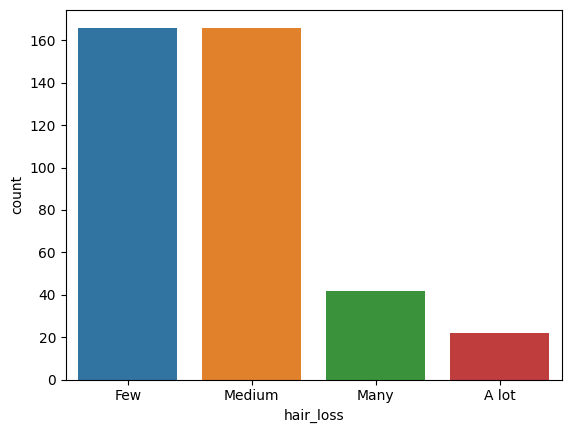

In [16]:
sns.countplot(data = data_object, x = 'hair_loss')

Akan dilakukan mapping [0..3]

## pressure_level

In [17]:
data_object['pressure_level'].unique()

array(['Low', 'Medium', 'High', 'Very High'], dtype=object)

<Axes: xlabel='pressure_level', ylabel='count'>

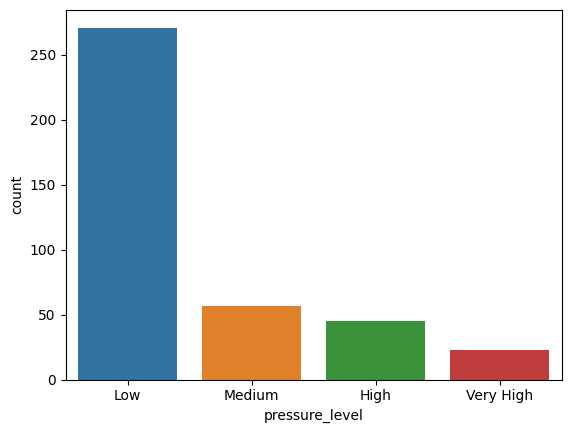

In [18]:
sns.countplot(data = data_object, x = 'pressure_level')

<Axes: xlabel='pressure_level', ylabel='count'>

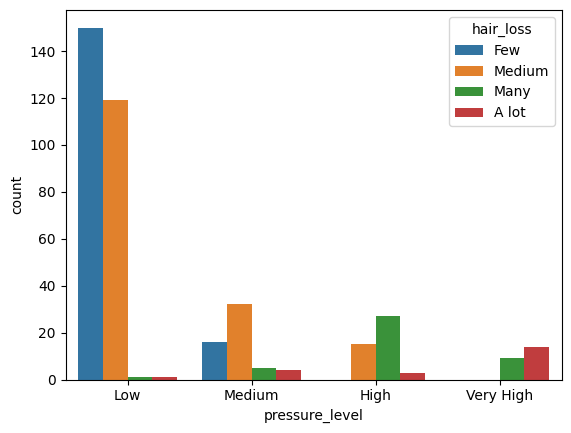

In [19]:
sns.countplot(data = data_object, x = 'pressure_level', hue = 'hair_loss')

Akan dilakukan mapping [0..3]

## school_assesssment

In [20]:
data_object['school_assesssment'].unique()

array(['None', 'Individual ass', 'Team ass', 'Final exam revision',
       'Final exam'], dtype=object)

<Axes: xlabel='school_assesssment', ylabel='count'>

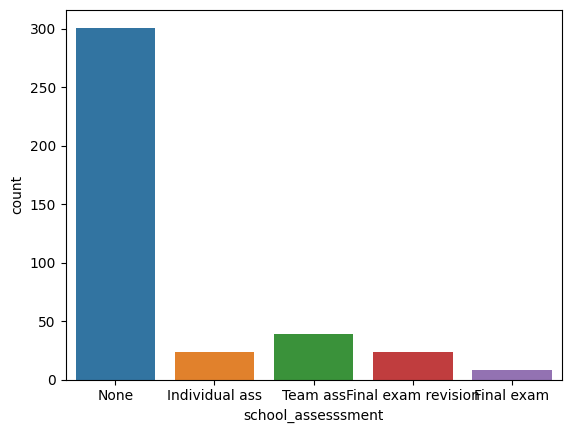

In [21]:
sns.countplot(data = data_object, x = 'school_assesssment')

<Axes: xlabel='school_assesssment', ylabel='count'>

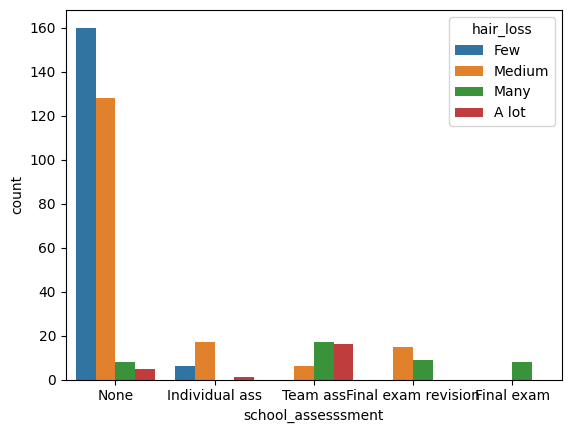

In [22]:
sns.countplot(data = data_object, x = 'school_assesssment', hue = 'hair_loss')

Akan dilakukan one hot encoding

## stress_level

In [23]:
data_object['stress_level'].unique()

array(['Low', 'Medium', 'High', 'Very High'], dtype=object)

<Axes: xlabel='stress_level', ylabel='count'>

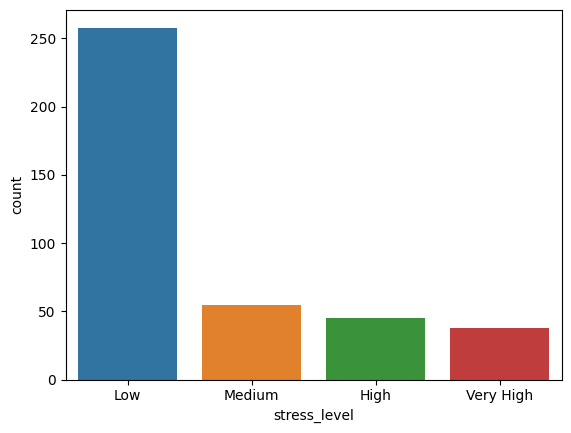

In [24]:
sns.countplot(data = data_object, x = 'stress_level')

<Axes: xlabel='stress_level', ylabel='count'>

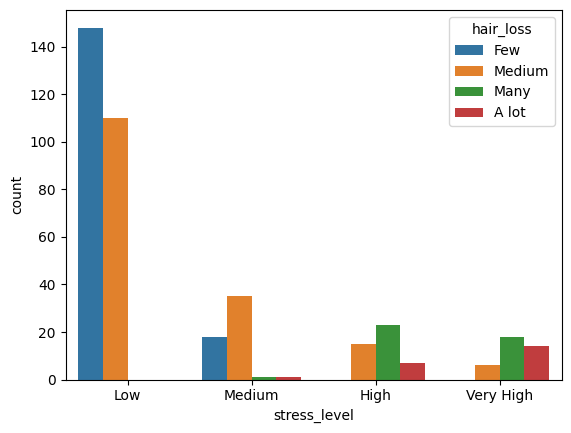

In [25]:
sns.countplot(data = data_object, x = 'stress_level', hue = 'hair_loss')

Akan dilakukan mapping [0..3]

## shampoo_brand

In [26]:
data_object['shampoo_brand'].unique()

array(['Pantene', 'Hair & Shoulder'], dtype=object)

<Axes: xlabel='shampoo_brand', ylabel='count'>

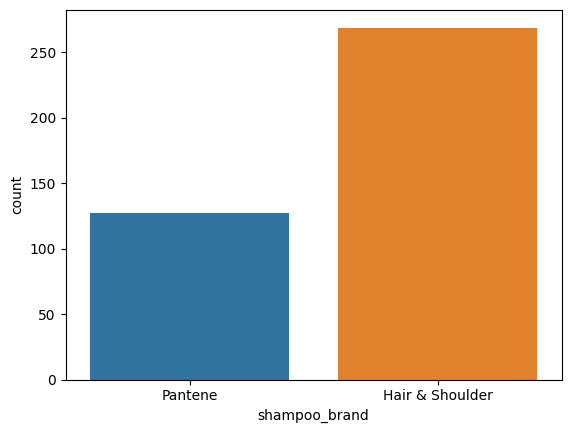

In [27]:
sns.countplot(data = data_object, x = 'shampoo_brand')

<Axes: xlabel='shampoo_brand', ylabel='count'>

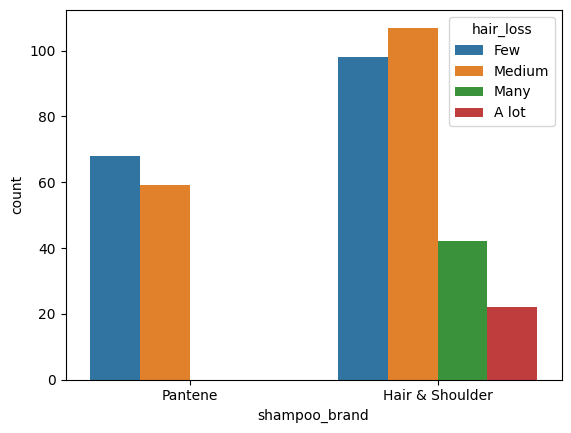

In [28]:
sns.countplot(data = data_object, x = 'shampoo_brand', hue = 'hair_loss')

Akan dilakukan one hot encoding

## swimming

In [29]:
data_object['swimming'].unique()

array(['No', 'Yes'], dtype=object)

<Axes: xlabel='swimming', ylabel='count'>

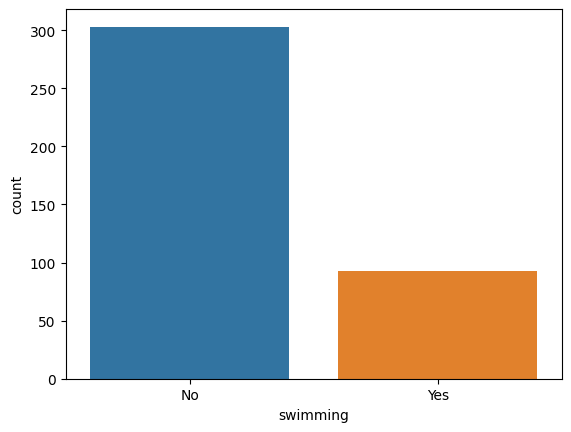

In [30]:
sns.countplot(data = data_object, x = 'swimming')

<Axes: xlabel='swimming', ylabel='count'>

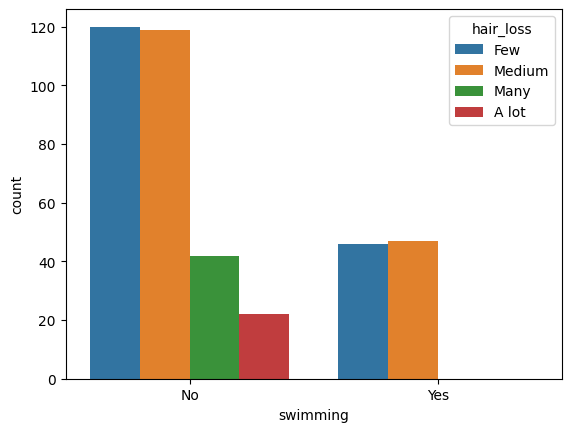

In [31]:
sns.countplot(data = data_object, x = 'swimming', hue = 'hair_loss')

Akan dilakukan mapping [0..1]

## hair_washing

In [32]:
data_object['hair_washing'].unique()

array(['Y', 'N'], dtype=object)

<Axes: xlabel='hair_washing', ylabel='count'>

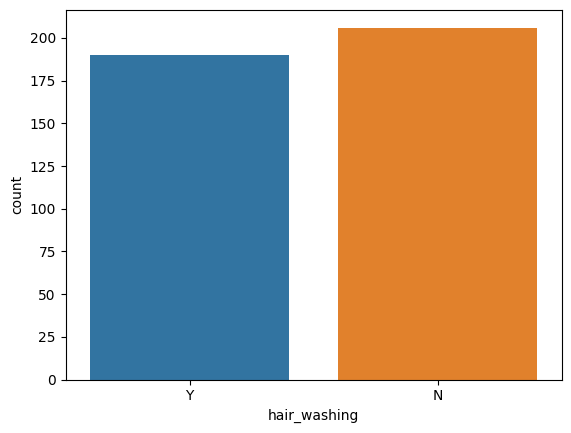

In [33]:
sns.countplot(data = data_object, x = 'hair_washing')

<Axes: xlabel='hair_washing', ylabel='count'>

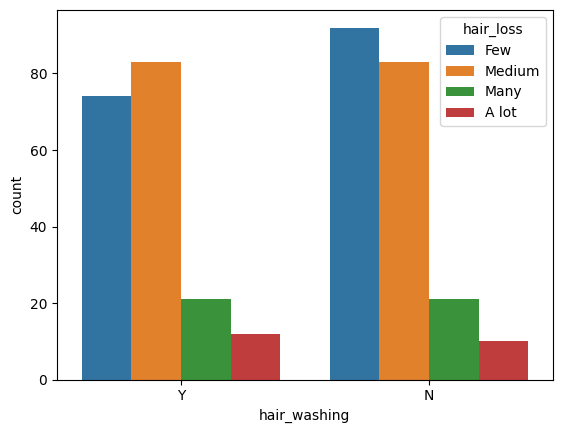

In [34]:
sns.countplot(data = data_object, x = 'hair_washing', hue = 'hair_loss')

Akan dilakukan mapping [0..1]

## dandruff

In [35]:
data_object['dandruff'].unique()

array(['None', 'Few', 'Many'], dtype=object)

<Axes: xlabel='dandruff', ylabel='count'>

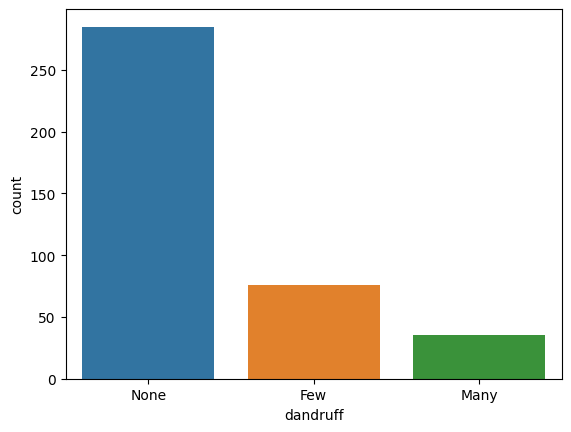

In [36]:
sns.countplot(data = data_object, x = 'dandruff')

<Axes: xlabel='dandruff', ylabel='count'>

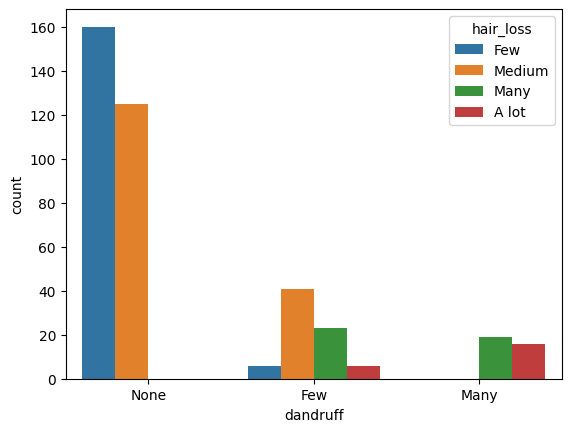

In [37]:
sns.countplot(data = data_object, x = 'dandruff', hue = 'hair_loss')

Akan dilakukan mapping [0..2]

# data_num

In [38]:
data_num.columns

Index(['stay_up_late', 'coffee_consumed', 'brain_working_duration',
       'hair_grease', 'libido'],
      dtype='object')

## stay_up_late

In [39]:
data_num['stay_up_late'].unique()

array([2, 0, 3, 1, 4, 5, 6, 8])

<Axes: xlabel='stay_up_late', ylabel='count'>

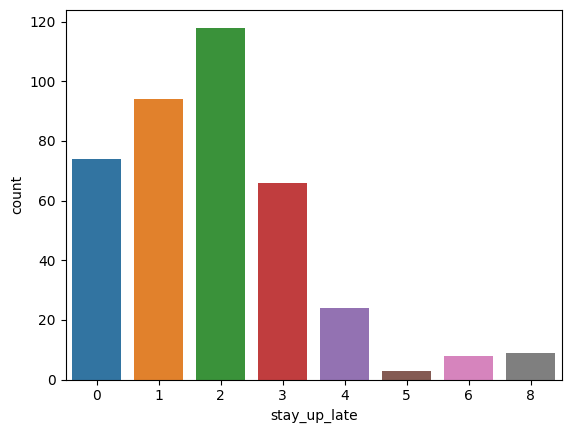

In [40]:
sns.countplot(data = data_num, x = 'stay_up_late')

<Axes: xlabel='stay_up_late', ylabel='count'>

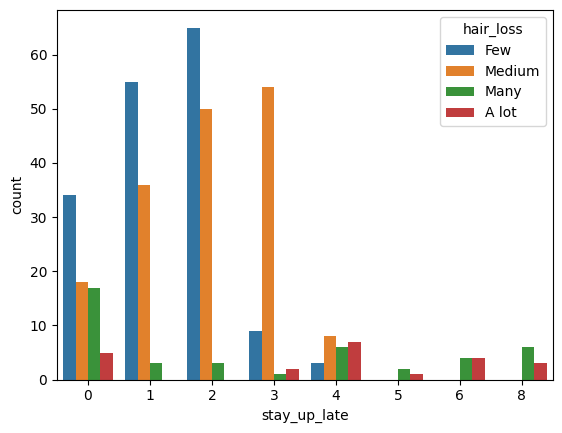

In [41]:
sns.countplot(data = data_num, x = 'stay_up_late', hue = data_object['hair_loss'])

## coffee_consumed

In [42]:
data_num['coffee_consumed'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

<Axes: xlabel='coffee_consumed', ylabel='count'>

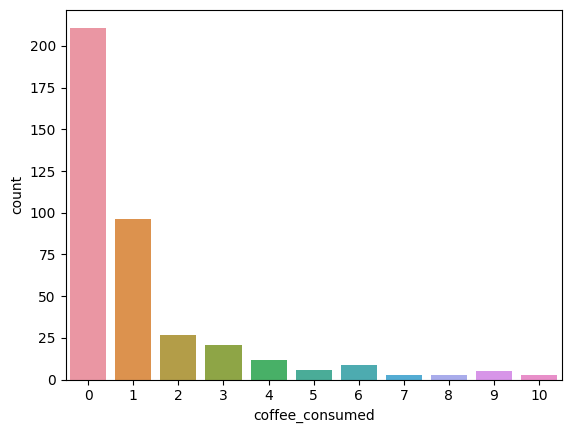

In [43]:
sns.countplot(data = data_num, x = 'coffee_consumed')

<Axes: xlabel='coffee_consumed', ylabel='count'>

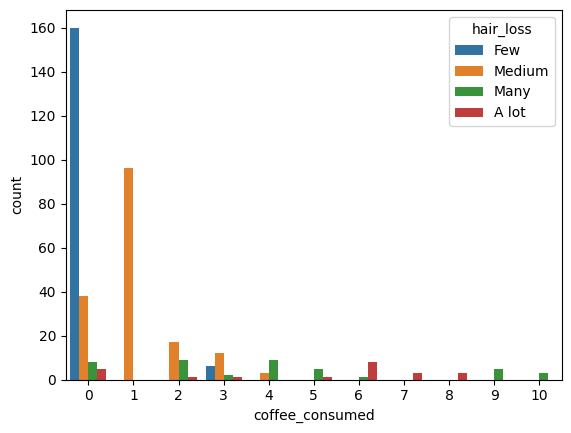

In [44]:
sns.countplot(data = data_num, x = 'coffee_consumed', hue = data_object['hair_loss'])

## brain_working_duration

In [45]:
data_num['brain_working_duration'].unique()

array([ 1,  3,  0,  2,  6,  7,  5,  8,  9, 10, 12, 13, 16, 18, 11])

<Axes: xlabel='brain_working_duration', ylabel='count'>

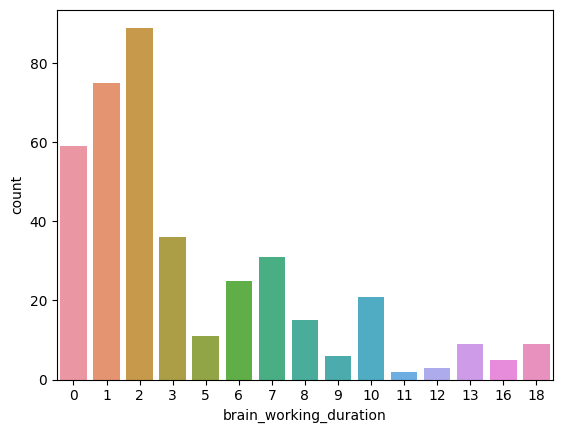

In [46]:
sns.countplot(data = data_num, x = 'brain_working_duration')

<Axes: xlabel='brain_working_duration', ylabel='count'>

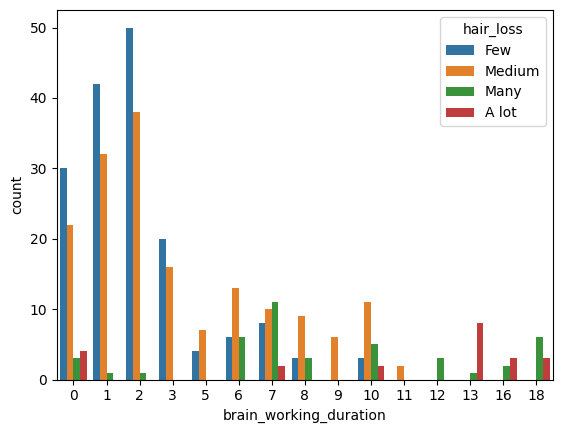

In [47]:
sns.countplot(data = data_num, x = 'brain_working_duration', hue = data_object['hair_loss'])

## hair_grease

In [48]:
data_num['hair_grease'].unique()

array([3., 1., 2., 4., 5.])

<Axes: xlabel='hair_grease', ylabel='count'>

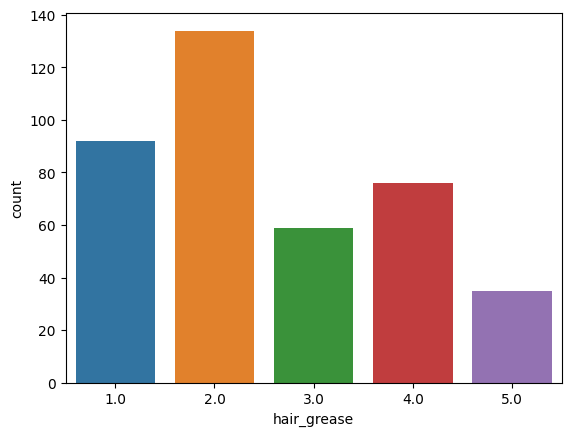

In [49]:
sns.countplot(data = data_num, x = 'hair_grease')

<Axes: xlabel='hair_grease', ylabel='count'>

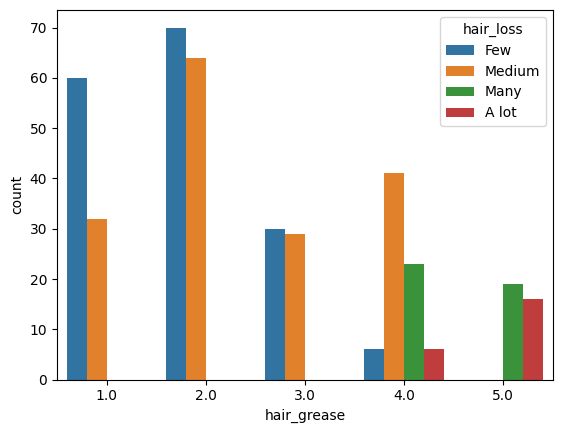

In [50]:
sns.countplot(data = data_num, x = 'hair_grease', hue = data_object['hair_loss'])

## libido

In [51]:
data_num['libido'].unique()

array([1, 2, 3, 4, 5, 0])

<Axes: xlabel='libido', ylabel='count'>

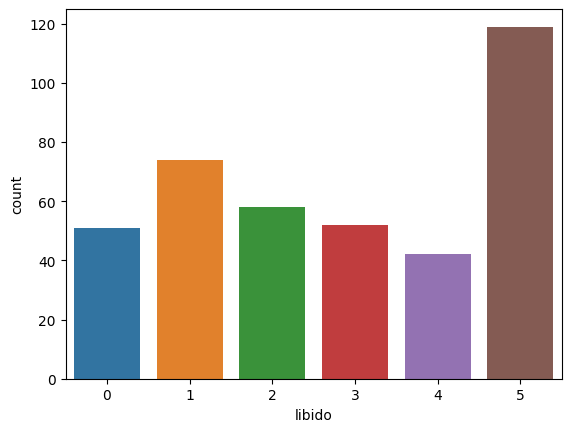

In [52]:
sns.countplot(data = data_num, x = 'libido')

<Axes: xlabel='libido', ylabel='count'>

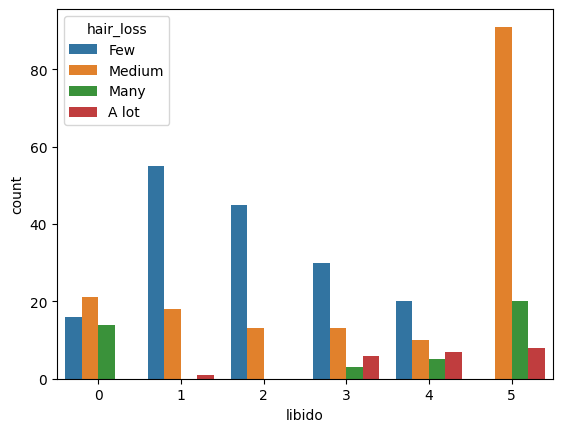

In [53]:
sns.countplot(data = data_num, x = 'libido', hue = data_object['hair_loss'])

# Feature Engineering

In [54]:
# delete column date
data = data.drop('date ', axis = 1)

In [55]:
data_object.columns

Index(['date ', 'hair_loss', 'pressure_level', 'school_assesssment',
       'stress_level', 'shampoo_brand', 'swimming', 'hair_washing',
       'dandruff'],
      dtype='object')

In [56]:
hair_loss_map ={
    'Few': 0, 'Medium': 1, 'Many': 2, 'A lot': 3
}
pressure_level_map ={
    'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3
}
stress_level_map ={
    'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3
}
swimming_map ={
    'No': 0, 'Yes': 1
}
hair_washing_map ={
    'N': 0, 'Y': 1
}
dandruff_map ={
    'None': 0, 'Few': 1, 'Many': 2
}

In [57]:
data['hair_loss'] = data['hair_loss'].replace(hair_loss_map)
data['pressure_level'] = data['hair_loss'].replace(pressure_level_map)
data['stress_level'] = data['hair_loss'].replace(stress_level_map)
data['swimming'] = data['hair_loss'].replace(swimming_map)
data['hair_washing'] = data['hair_loss'].replace(hair_washing_map)
data['dandruff'] = data['hair_loss'].replace(dandruff_map)

In [58]:
one_hot = ['school_assesssment','shampoo_brand']
data = pd.get_dummies(data,one_hot,drop_first=True)

In [59]:
data['hair_grease'] = data['hair_grease'].astype(int)

# Correlation

In [60]:
data.head()

,hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,stress_level,swimming,hair_washing,hair_grease,dandruff,libido,school_assesssment_Final exam revision,school_assesssment_Individual ass,school_assesssment_None,school_assesssment_Team ass,shampoo_brand_Pantene
0,0,2,0,0,1,0,0,0,3,0,1,0,0,1,0,1
1,0,0,0,0,3,0,0,0,1,0,1,0,0,1,0,1
2,1,3,1,1,0,1,1,1,2,1,2,0,0,1,0,1
3,0,2,0,0,1,0,0,0,3,0,3,0,0,1,0,1
4,0,2,0,0,1,0,0,0,1,0,2,0,0,1,0,1


<Axes: >

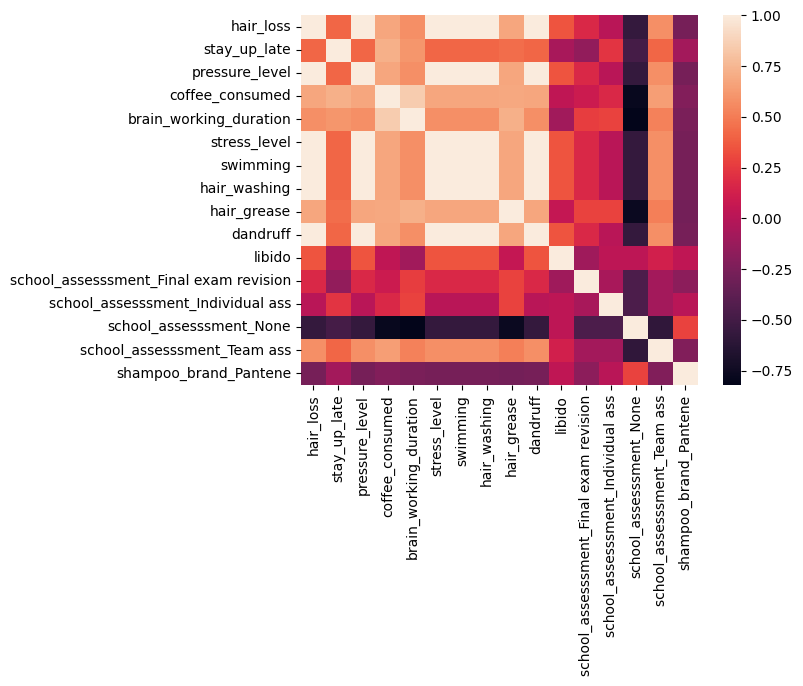

In [61]:
sns.heatmap(data.corr())

In [62]:
data.corr()['hair_loss'][:].sort_values(ascending = True)

school_assesssment_None                  -0.571165
shampoo_brand_Pantene                    -0.272522
school_assesssment_Individual ass         0.010682
school_assesssment_Final exam revision    0.174349
libido                                    0.349512
stay_up_late                              0.412614
school_assesssment_Team ass               0.573427
brain_working_duration                    0.577395
hair_grease                               0.674670
coffee_consumed                           0.678617
hair_loss                                 1.000000
pressure_level                            1.000000
stress_level                              1.000000
swimming                                  1.000000
hair_washing                              1.000000
dandruff                                  1.000000
Name: hair_loss, dtype: float64

Fitur yang digunakan adalah yang memiliki korelasi tinggi dan mudah diketahui oleh pengguna nantinya.

In [63]:
data[["hair_loss","stay_up_late","coffee_consumed","brain_working_duration","pressure_level","stress_level","swimming","hair_washing","dandruff"]].to_csv("/content/machine-learning/Dataset/Dataset-Tabular/hair_loss_selected.csv", index = False)